# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

# <h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [187]:
### Basic Setup

import pandas as pd
from scipy import stats
from matplotlib import pyplot as plt

df = pd.read_csv('data/human_body_temperature.csv')

## QUESTION 1: Does the temperature sample follow a normal distribution?

In [188]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


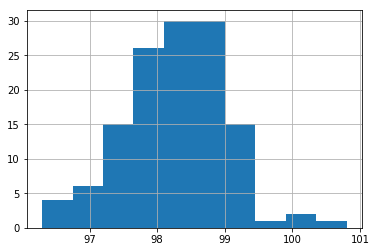

In [189]:
_ = df['temperature'].hist(bins=10)

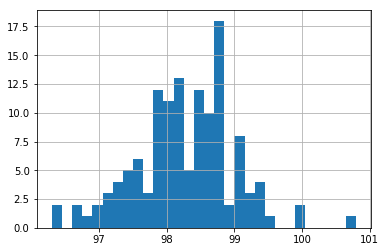

In [190]:
_ = df['temperature'].hist(bins=30)

In [191]:
## ANSWER 1: 

stats.normaltest(df['temperature'])

NormaltestResult(statistic=2.703801433319203, pvalue=0.2587479863488254)

### ANSWER 1: The sample is approximately normal. 

<p>Although there are some irregularities, there is roughly a 25% chance that a sample this jagged could be drawn from a normal distribution. Because temperature is affected by many small variables that are unlikely to be highly correlated, it is reasonable to assume that the temperatures of unrelated humans would form a normal distribution, and this data does not prompt us to reject the null hypothesis that the sample is normal.</p>

### QUESTION 2: IS THE SAMPLE LARGE AND INDEPENDENT?

In [192]:
df.shape

(130, 3)

### ANSWER 2: Yes. 

<p>The sample size is relatively large (130 >> 30) and the samples appear to be mutually independent based on the addition of other biological data, e.g. gender, heart rate, suggesting that the temperatures were drawn from separate human beings. This sample is an appropriate basis for bootstrapping and hypothesis testing.</p>

### QUESTION 3: IS THE TRUE POPULATION MEAN 98.6 DEGREES FARENHEIT?

In [193]:
# Calculate sample mean
sample_mean = df['temperature'].mean()
sample_mean

98.24923076923075

In [194]:
# Calculate standard error of sample
std_error = df['temperature'].std() / (df['temperature'].count() ** 0.5)
std_error

0.06430441683789102

In [195]:
# The sample mean is off by several standard errors from the presumed population mean. Either the sample is very unusual,
# or the true population mean is not 98.6.

pop_mean = 98.6
zscore = (sample_mean - pop_mean) / std_error
zscore

-5.4548232923645195

In [196]:
# It is more appropriate to use a t-test here than a z-test, because we do not know the true standard deviation
# of the population. Moreover, there is only one sample here, so a one-sample test is most appropriate.
# Finally, the t-test should be 2-sided, becuase we are unsure of which direction (if any) the sample is likely to
# deviate from the mean.

from scipy import stats
stats.ttest_1samp(df['temperature'], pop_mean)

# The t-test reveals that the odds of drawing such an unusual sample from the presumed population are less than
# 1 in 4 million. The t-test warrants rejecting the null hypothesis that this sample was drawn from a normal distribution
# centered around a mean of 98.6.

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

In [197]:
# As instructed, I am also applying a z-test, even though this is less appropriate for the data.
2 * stats.norm.cdf(zscore)

# The z-test suggests a probability of drawing this sample that is even less than the probability given by the t-test.
# This makes sense, because one way the t-test could have had such an extreme value is if the standard deviation was
# actually much larger than the standard error. By improperly assuming that the standard deviation is in fact equal
# to the standard error, the z-test eliminates that possibility, which constituted the bulk of the (limited) probability
# that the sample was in fact drawn from a normal distribution centered around 98.6.

4.9021570141012155e-08

In [198]:
# As instructed, I am also conducting a bootstrapping experiment, although with such a low t-score, it is difficult to
# see what a bootstrapping experiment could add to the analysis.

import numpy as np
bs_sample_means = np.empty(10000)
for i in range(10000):
    bs_sample = np.random.choice(df['temperature'], size=len(df['temperature']))
    bs_sample_means[i] = bs_sample.mean()
bs_error = abs(bs_sample_means - pop_mean)
actual_error = abs(sample_mean - pop_mean)
p = np.sum(bs_error < std_error) / 10000
p        

0

### ANSWER 3

<p>The t-test and z-test both indicate that the probability of obtaining this sample from a normally distributed population with a mean of 98.6 is less than 1 in a million. Therefore, it is unlikely that the true population mean is 98.6.</p>

<p>Even with 10,000 bootstrapped replications, none of them produced a mean that deviated from 98.6 less sharply than the standard error calculated from the original sample. This further confirms that there is a problem with either the sample or the supposed population mean of 98.6.</p>

### QUESTION 4: TAKE A SMALL SAMPLE OF 10 CASES AND REPEAT THE Z TEST AND T TEST.

##### Z TEST

In [199]:
small_samp = np.random.choice(df['temperature'], 10)
small_samp_mean = small_samp.mean()
small_samp_z = (small_samp_mean - pop_mean) / df['temperature'].std()
zp = 2 * stats.norm.cdf(small_samp_z)
zp

0.7641302850695848

##### T TEST

In [200]:
t, tp = stats.ttest_1samp(small_samp, pop_mean)
tp

0.6112889188317343

### ANSWER 4

<p>The z-test is more appropriate here because we actually know the standard deviation of the population that the sample is drawn from; it is simply the standard deviation of the original, larger sample.</p>

<p>The z-test accurately tells us what we already know, i.e., that it is perfectly reasonable to suppose that the small
sample was drawn from the larger sample, with p-values in the range of 0.4 to 0.6. This makes sense, becuase the small
sample was in fact drawn from the larger sample.</p>

<p>The t-test adds unnecessary skepticism, yielding p-values in the range of 0.1 to 0.2. Although still more or less
correct, the t-test inappropriately reduces the probability that the small sample was drawn from the larger sample
by adding in the possibility that the standard deviation was different than it actually was, and therefore improperly
suggests that there is some weak reason to reject the null hypothesis that the small sample was drawn from the 
large sample, even though there is in fact no such reason and the null hypothesis is correct.</p>

### QUESTION 5: AT WHAT TEMPERATURE SHOULD WE CONSIDER A PERSON'S TEMPERATURE TO BE "ABNORMAL"?

<p> This question is inherently subjective, because there is no obvious value of alpha to use when testing the significance of a putatively abnormal temperature. The histograms from Question 1 do not show any particular drop-off beyond which temperatures are especially unlikely; this makes sense, because the sample size is not large enough to draw any confident conclusions about rare or extreme cases. Nevertheless, setting alpha = 0.05 for the sake of practice, we can estimate the range of normal temperatures, assuming that this 130-person sample is in fact representative of the entire human population.</p>

##### Bootstrapping

In [201]:
conf_int = np.percentile(bs_sample_means, [2.5, 97.5])
conf_int

array([98.12384615, 98.37307692])

##### Z-TEST

In [202]:
target_z_low = stats.norm.ppf(.025)
target_z_high = stats.norm.ppf(.975)
[target_z_low, target_z_high]

[-1.9599639845400545, 1.959963984540054]

In [203]:
assumed_sd = df['temperature'].std()
low_temp_z = (target_z_low * assumed_sd) + sample_mean
high_temp_z = (target_z_high * assumed_sd) + sample_mean
[low_temp_z, high_temp_z]

[96.81221818540308, 99.68624335305842]

##### T-TEST

In [204]:
from scipy.stats import t
target_t_low = -1 * t.ppf(0.975, 129)
target_t_high = t.ppf(0.975, 129)
[target_t_low, target_t_high]

[-1.978524491458605, 1.978524491458605]

In [205]:
low_temp_t = (target_t_low * assumed_sd) + sample_mean
high_temp_t = (target_t_high * assumed_sd) + sample_mean
[low_temp_t, high_temp_t]

[96.79860993432573, 99.69985160413577]

### ANSWER 5

<p> According to this sample, normal human temperature ranges between 96.7 and 99.6, alpha = 0.05. A person with a temperature below 96.7 or above 99.6 could be considered to have abnormal temperature.</p>

### QUESTION 6: DOES TEMPERATURE VARY SIGNIFICANTLY BY GENDER?

In [206]:
men = df[df['gender'] == 'M']
men.head()

,temperature,gender,heart_rate
2,97.8,M,73.0
5,99.2,M,83.0
6,98.0,M,71.0
7,98.8,M,78.0
12,98.2,M,72.0


In [207]:
women = df[df['gender'] == 'F']
women.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
3,99.2,F,66.0
4,98.0,F,73.0
8,98.4,F,84.0


In [208]:
men = men['temperature']
women = women['temperature']
[men.mean(), women.mean()]

[98.10461538461537, 98.39384615384614]

In [209]:
[men.std(), women.std()]

[0.698755762326591, 0.7434877527313664]

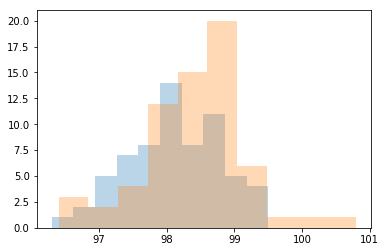

In [210]:
_ = plt.hist(men, alpha = 0.3)
_ = plt.hist(women, alpha = 0.3)

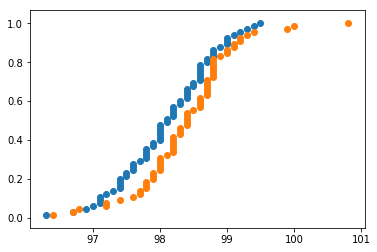

In [225]:
def ecdf(data):
    """ Compute ECDF """
    x = np.sort(data)
    n = x.size
    y = np.arange(1, n+1, dtype='float') / n
    return(x,y)

x, y = ecdf(men)
_ = plt.scatter(x, y)
x, y = ecdf(women)
_ = plt.scatter(x, y)

In [211]:
stats.ttest_ind(men, women, equal_var = False)

Ttest_indResult(statistic=-2.285434538165611, pvalue=0.023938264182934196)

### ANSWER #6

<p>I performed a 2-sample t-test because splitting the sample into men and women essentially creates two different samples, and we want to find out what the probability is that they could have each been drawn from the same population.</p>

<p>I set 'equal-var' to False because we should not assume that men and women have the same variance in temperature. On the contrary, we see that the men in this sample had a standard deviation of only 0.69, compared to the female standard deviation of 0.74. The true difference in variance between genders could be even larger in the real population.</p>

<p> The p-value was only 0.024, suggesting that the null hypothesis that there is no statistically significant difference between the temperature of people of either gender should be rejected. It does appear that women have a slightly higher mean temperature. However, as shown in the dual-color histogram above and the dual-color Cumulative Distribution Functions above, the difference is clear but is only slight, and may not be significant for practical or medical purposes. For example, the box label for the Juning brand home thermometer notes that body temperature can vary up to a full 1.0 degrees F simply over the course of the day, and that drinking tea, hot weather, and/or exercise can also raise the body temperature an additional 2.0 degrees F. Against this background, a gender-based variation of approximately 0.3 degrees F may not be very important in most contexts.